In [1]:
!git clone https://github.com/saaresearch/ODRS.git
%cd ODRS/


Cloning into 'ODRS'...
remote: Enumerating objects: 1978, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 1978 (delta 30), reused 25 (delta 18), pack-reused 1905
Receiving objects: 100% (1978/1978), 60.18 MiB | 18.23 MiB/s, done.
Resolving deltas: 100% (899/899), done.
/media/space/ssd_1_tb_evo_sumsung/DemoODRS/ODRS


# Installing dependencies

In [2]:
!pip install -r requirements.txt
# %cd ..

# Download dataset

[Link to data and code on Kaggle](https://www.kaggle.com/datasets/parohod/warp-waste-recycling-plant-dataset?select=Warp-D)

In [3]:
!git clone https://github.com/AIRI-Institute/WaRP

Cloning into 'WaRP'...
remote: Enumerating objects: 16712, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 16712 (delta 22), reused 0 (delta 0), pack-reused 16676
Receiving objects: 100% (16712/16712), 794.76 MiB | 10.63 MiB/s, done.
Resolving deltas: 100% (104/104), done.
Updating files: 100% (16898/16898), done.


## Image Example

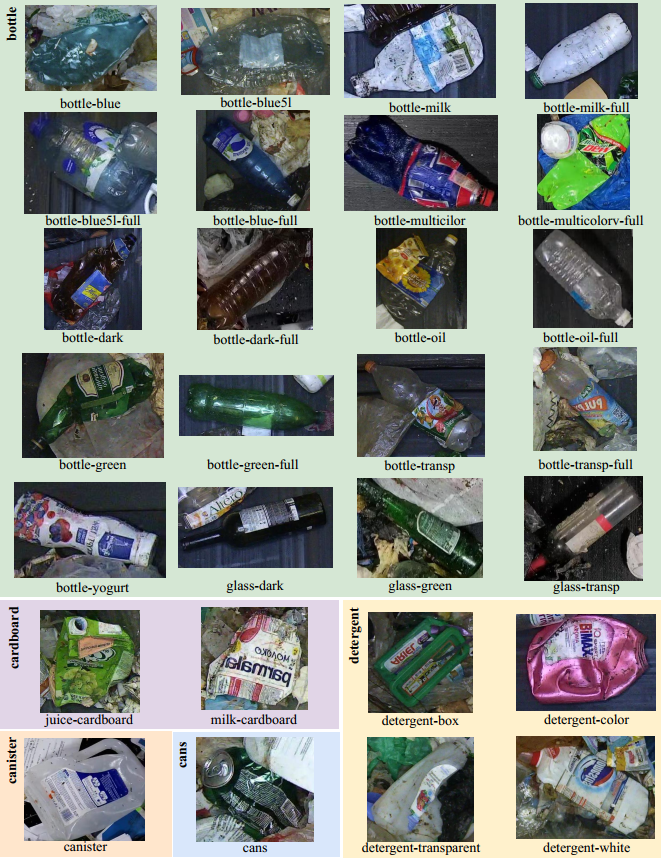

## Structure

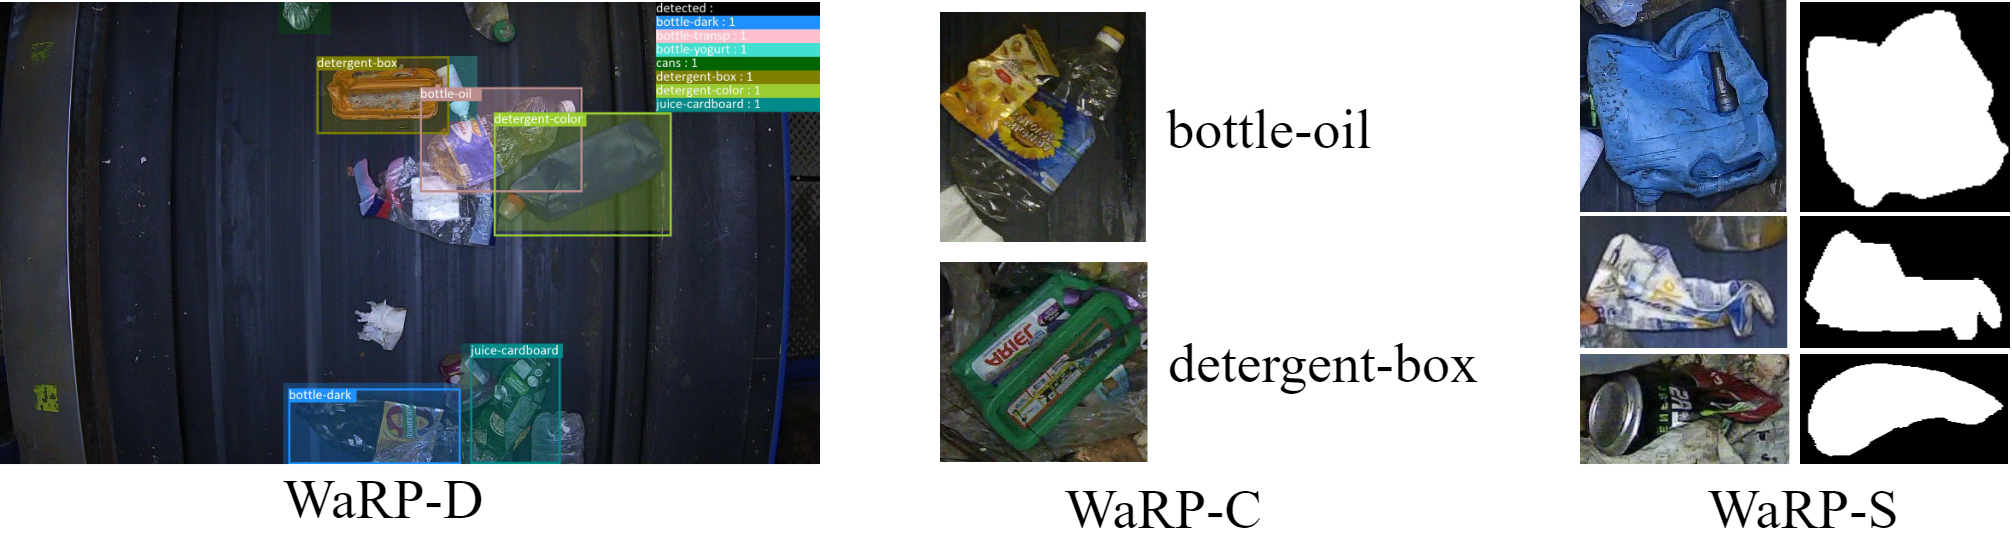

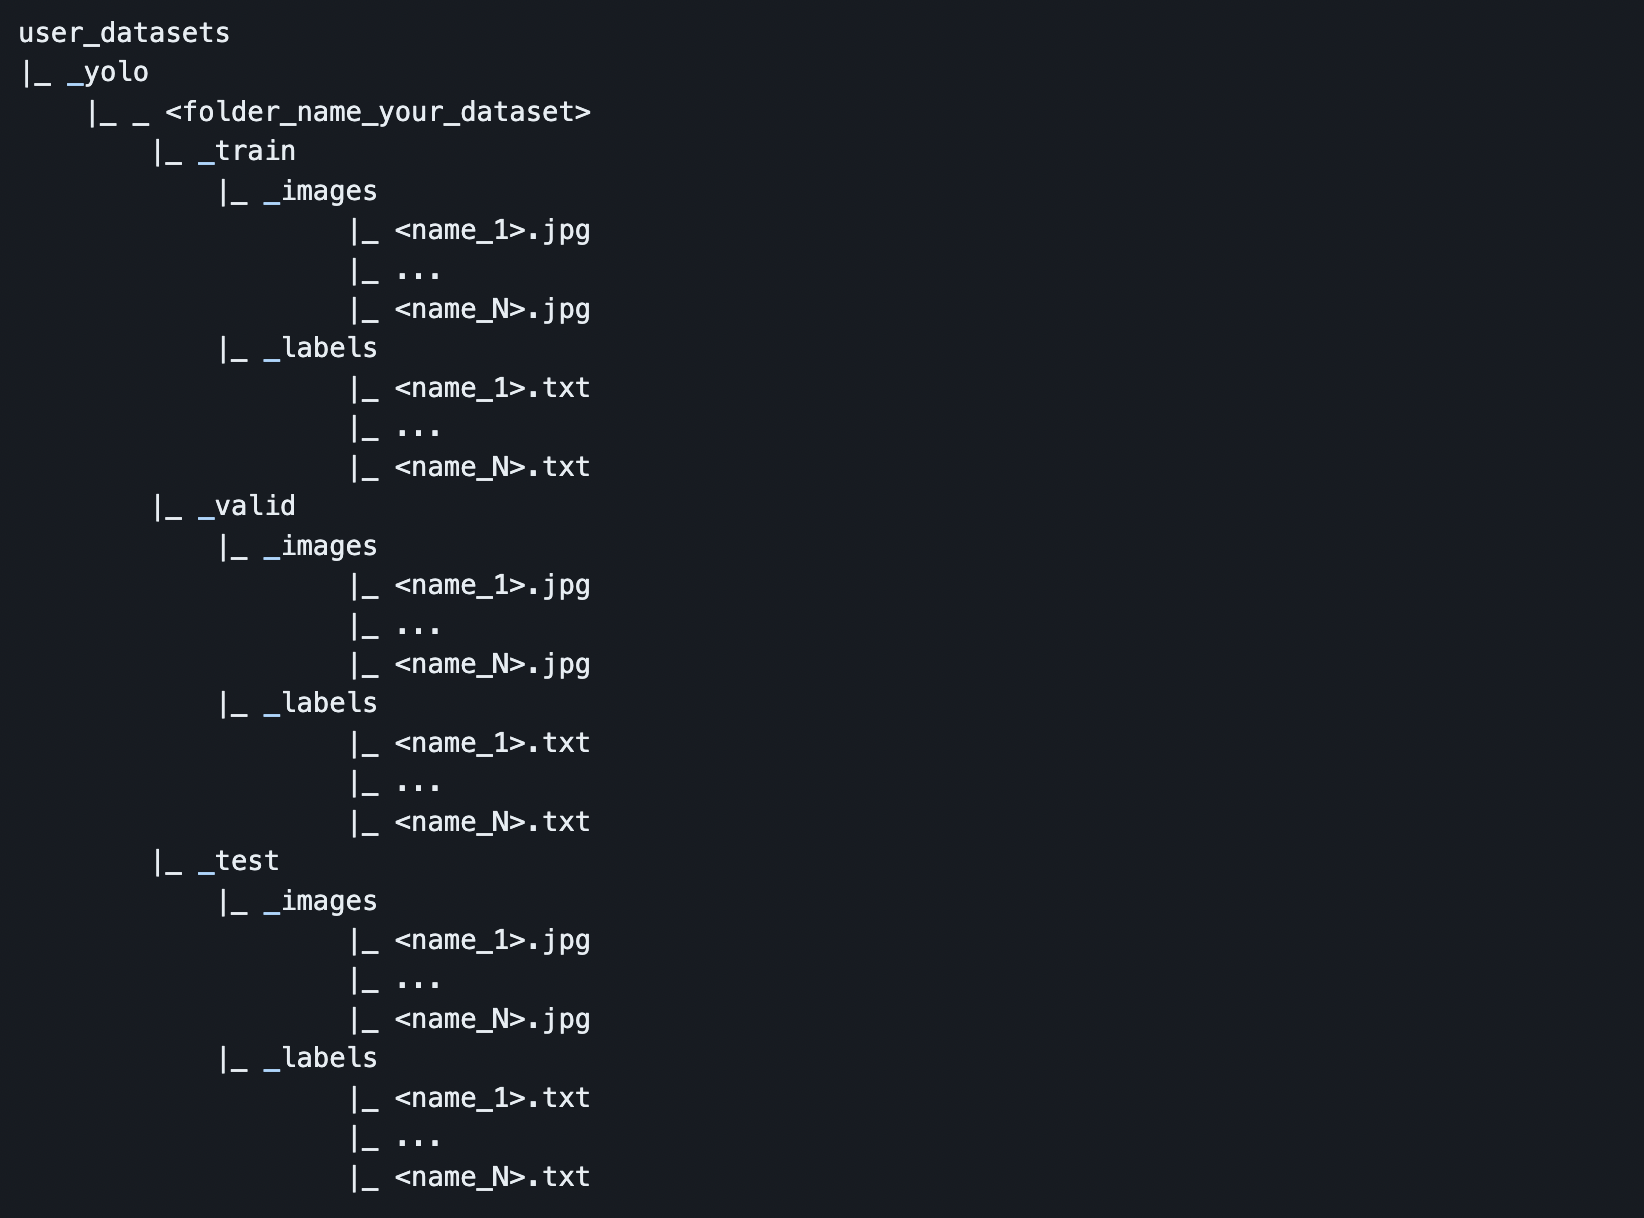

# ML Recommendation System

In [4]:
!cp WaRP/Warp-D/classes.txt .

In [5]:
from ODRS.ODRS.api.ODRS import ODRS

odrs = ODRS(job="ml_recommend", data_path='WaRP/Warp-D/', classes="classes.txt",
              gpu=True, accuracy=10, speed=1)
odrs.fit()

Number of images: 5948
W: 1920
H: 1080
Gini Coefficient: 94.0
Number of classes: 28
Top models for training:
1) yolov8x6
2) yolov5x
3) yolov7


# Model traning

## Preparing dataset

In [6]:
!mkdir WaRP/Warp-D/valid
!cp -r WaRP/Warp-D/test/* WaRP/Warp-D/valid/


In [7]:
!cp -r WaRP/Warp-D user_datasets/yolo/

Login in wandb(yolo requiements)

In [8]:

import wandb
wandb.init()

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: asmetanin. Use `wandb login --relogin` to force relogin


In [9]:
from ODRS.ODRS.api.ODRS import ODRS
#init object with parameters
odrs_1 = ODRS(job="object_detection", data_path = '/media/space/ssd_1_tb_evo_sumsung/DemoODRS/ODRS/user_datasets/yolo/Warp-D', classes = "classes.txt",
                img_size = "512", batch_size = "25", epochs = "300",
                model = 'yolov8x-p6', gpu_count = 1, select_gpu = "0", config_path = "dataset.yaml")

In [10]:
# start tranning
odrs_1.fit()



2023-11-25 21:49:23.507 | INFO     | ODRS.data_utils.create_config:create_config_data:117 - Create config file

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 6

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
plt.imshow(Image.open('ODRS/runs/2023-09-03_16-11-01_yolov8x6/exp/val_batch0_pred.jpg'))

In [ ]:
!yolo val detect data=ODRS/runs/2023-09-03_16-11-01_yolov8x6/dataset.yaml device=0 model=ODRS/runs/2023-09-03_16-11-01_yolov8x6/exp/weights/best.pt